In [218]:
#@title import libraries
import numpy as np

from sklearn import svm
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

%matplotlib inline

In [219]:
#@title Creating 40 seperable points

X, y = make_blobs(n_samples = 40, centers = 2, random_state = 2)

In [220]:
#@title Fit The Model

model = svm.SVC(kernel='linear', C = 1)
model.fit(X, y)

SVC(C=1, kernel='linear')

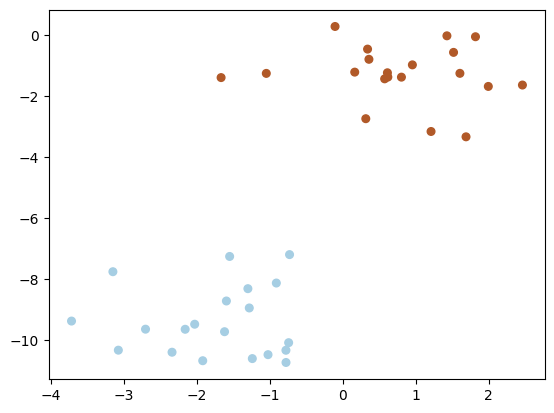

In [221]:
#@title Visualize the data in graph form

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [222]:
#@title Make Predictions

newData = [[3, 4], [5, 6], [7, 8], [-1, -2], [-1, -8]]
print(model.predict(newData))

[1 1 1 1 0]


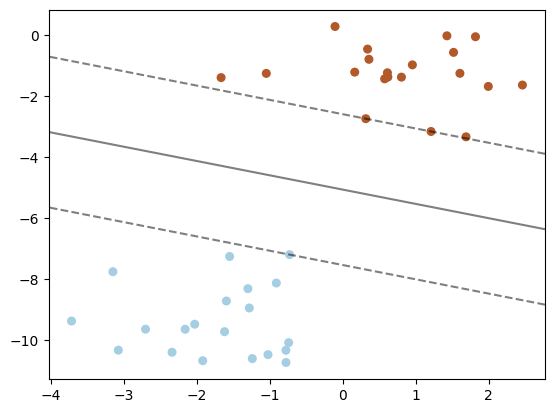

In [223]:
#@title Plotting Support Vectors

#Fit the Model again

model = svm.SVC(kernel='linear', C=1000)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#Plot the Decision Function

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#Create grid to evaluate model

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(
    XX,
    YY,
    Z,
    colors='k',
    levels=[-1, 0, 1],
    alpha = 0.5,
    linestyles=['--', '-', '--']
  )

#Plot Support Vecotrs

ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s = 100,
    linewidth = 1,
    facecolors='none'
  )
plt.show()